## Predicting No Show for Medical Appointments

##### Reading and Peeking into data

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('KaggleV2-May-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


##### Count total records and check for NaN values

In [2]:
tot = len(df)
print('Total number of records %d'%tot)
print('Contains NaN values: ' + str(df.isnull().values.any()))

Total number of records 110527
Contains NaN values: False


##### Renaming some misspelled column names

In [3]:
df = df.rename(columns = {"Hipertension":"Hypertension",'Handcap':'Handicap'})

##### Counting show and no-show cases

In [4]:
pos = len(df[df['No-show']=='Yes'])
neg = len(df[df['No-show']=='No'])
print('No show=%d Show=%d, Total=%d'%(pos,neg,(pos+neg)))
print('Percentage of no-show=%0.2f    Percentage of show=%0.2f'%(pos*100/tot,neg*100/tot))

No show=22319 Show=88208, Total=110527
Percentage of no-show=20.19    Percentage of show=79.81


##### Coverting date-time from string to datetime

In [5]:
df['ScheduledDay'] = df.ScheduledDay.apply(lambda x: datetime.strptime(x.strip(),"%Y-%m-%dT%H:%M:%SZ"))
df['AppointmentDay'] = df.AppointmentDay.apply(lambda x: datetime.strptime(x.strip(),"%Y-%m-%dT%H:%M:%SZ"))

##### Creating features: Day of Week for Appointment Day, Day of Week for Scheduled Day, Waiting time, Appointment Hour of Day, Appointment Month

In [6]:
def calculateHour(dt):
    hour = dt.hour
    minute = dt.minute
    second = dt.second
    return round(hour + minute/60 + second/3600)
df['HourOfDay'] = df.AppointmentDay.apply(calculateHour)
df['ScheduledDoW'] = df.ScheduledDay.apply(lambda x: x.weekday())
df['AppointmentDoW'] = df.AppointmentDay.apply(lambda x: x.weekday())
df['WaitingDays'] = df['AppointmentDay']-df['ScheduledDay']
df.WaitingDays = df.WaitingDays.apply(lambda x: x.days)
df['AppointmentMonth'] = df.AppointmentDay.apply(lambda x: x.month)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,HourOfDay,ScheduledDoW,AppointmentDoW,WaitingDays,AppointmentMonth
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,4,4,-1,4
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,4,4,-1,4
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,4,4,-1,4
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,4,4,-1,4
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,4,4,-1,4


##### Finding probability of no-show with respect to different features: Gender, Neighbourhood, Scholarship, Hypertension, Diabetes, Alcoholism, Handicap, SMS_received, ScheduledDoW, AppointmentDoW, AppointmentMonth, HourOfDay

No-show,No,Yes,ProbNoShow,Gender
Gender,,,,
F,57246,14594,0.203146,F
M,30962,7725,0.199679,M


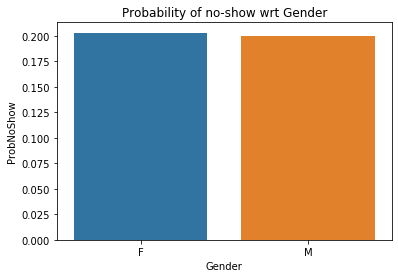

No-show,No,Yes,ProbNoShow,Neighbourhood
Neighbourhood,,,,
AEROPORTO,7,1,0.125000,AEROPORTO
ANDORINHAS,1741,521,0.230327,ANDORINHAS
ANTÔNIO HONÓRIO,221,50,0.184502,ANTÔNIO HONÓRIO
ARIOVALDO FAVALESSA,220,62,0.219858,ARIOVALDO FAVALESSA
BARRO VERMELHO,332,91,0.215130,BARRO VERMELHO
BELA VISTA,1523,384,0.201363,BELA VISTA
BENTO FERREIRA,665,193,0.224942,BENTO FERREIRA
BOA VISTA,254,58,0.185897,BOA VISTA
BONFIM,2223,550,0.198341,BONFIM


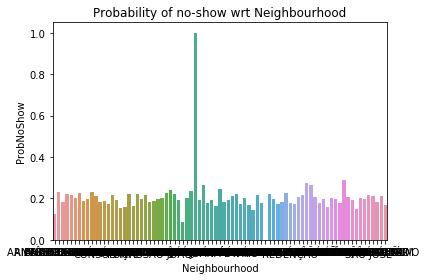

No-show,No,Yes,ProbNoShow,Scholarship
Scholarship,,,,
0,79925,19741,0.198072,0
1,8283,2578,0.237363,1


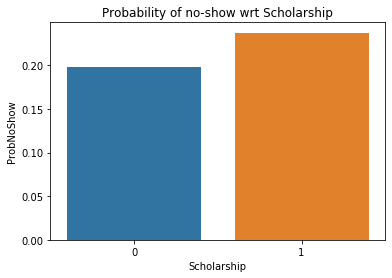

No-show,No,Yes,ProbNoShow,Hypertension
Hypertension,,,,
0,70179,18547,0.209037,0
1,18029,3772,0.173020,1


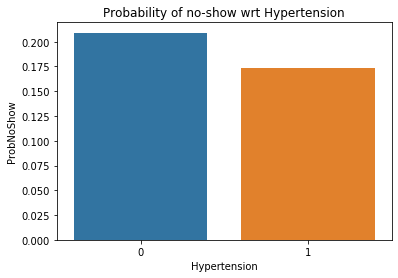

No-show,No,Yes,ProbNoShow,Diabetes
Diabetes,,,,
0,81695,20889,0.203628,0
1,6513,1430,0.180033,1


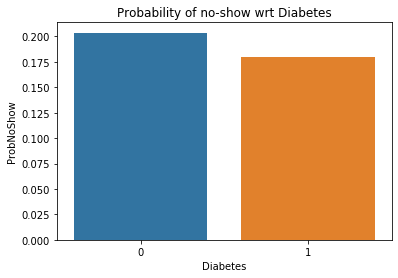

No-show,No,Yes,ProbNoShow,Alcoholism
Alcoholism,,,,
0,85525,21642,0.201946,0
1,2683,677,0.201488,1


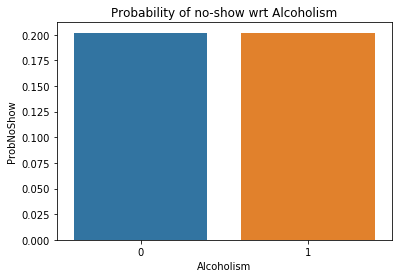

No-show,No,Yes,ProbNoShow,Handicap
Handicap,,,,
0,86374,21912,0.202353,0
1,1676,366,0.179236,1
2,146,37,0.202186,2
3,10,3,0.230769,3
4,2,1,0.333333,4


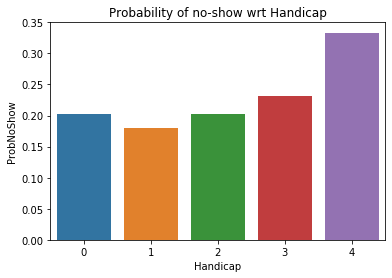

No-show,No,Yes,ProbNoShow,SMS_received
SMS_received,,,,
0,62510,12535,0.167033,0
1,25698,9784,0.275745,1


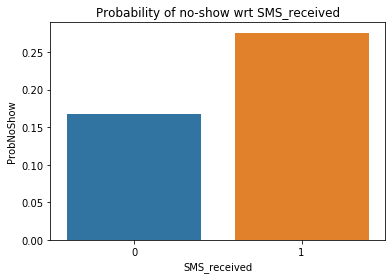

No-show,No,Yes,ProbNoShow,ScheduledDoW
ScheduledDoW,,,,
0,18524,4561,0.197574,0
1,20877,5291,0.202194,1
2,19383,4879,0.201096,2
3,14373,3700,0.204725,3
4,15028,3887,0.205498,4
5,23,1,0.041667,5


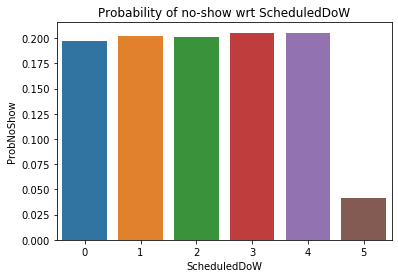

No-show,No,Yes,ProbNoShow,AppointmentDoW
AppointmentDoW,,,,
0,18025,4690,0.206471,0
1,20488,5152,0.200936,1
2,20774,5093,0.196892,2
3,13909,3338,0.193541,3
4,14982,4037,0.212261,4
5,30,9,0.230769,5


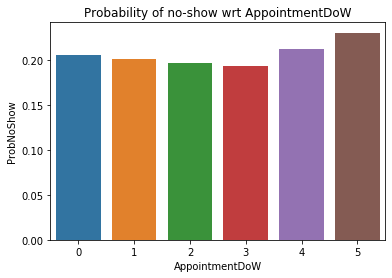

No-show,No,Yes,ProbNoShow,AppointmentMonth
AppointmentMonth,,,,
4,2602,633,0.195672,4
5,64037,16804,0.207865,5
6,21569,4882,0.184568,6


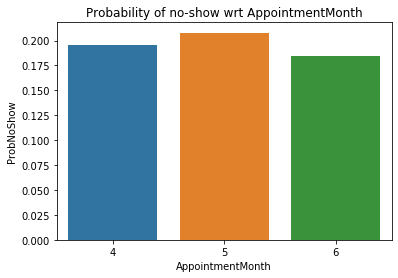

No-show,No,Yes,ProbNoShow,HourOfDay
HourOfDay,,,,
0,88208,22319,0.201933,0


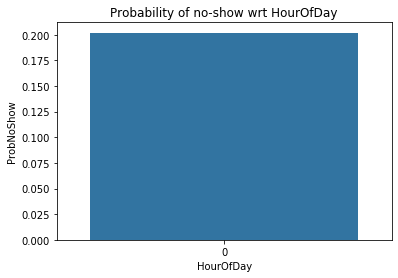

In [7]:
def checkNoShowProb(df,category):
    mydf = pd.crosstab(df[category], df['No-show'], rownames=[category], colnames=['No-show'])
    mydf['ProbNoShow'] = mydf['Yes']/(mydf['Yes']+mydf['No'])
    mydf[category] = mydf.index
    display(mydf)
    sns.barplot(data = mydf,y='ProbNoShow',x=category)
    plt.title('Probability of no-show wrt '+category)
    plt.show()
    
fea = ['Gender','Neighbourhood','Scholarship','Hypertension','Diabetes','Alcoholism',
       'Handicap','SMS_received','ScheduledDoW','AppointmentDoW','AppointmentMonth','HourOfDay']
for f in fea:
    checkNoShowProb(df,f)

##### Plotting probability of no-show with respect to different features: Age, WaitingDays

No-show,No,Yes,ProbNoShow,Age
Age,,,,
-1,1,0,0.000000,-1
0,2900,639,0.180559,0
1,1858,415,0.182578,1
2,1366,252,0.155748,2
3,1236,277,0.183080,3
4,1017,282,0.217090,4
5,1169,320,0.214909,5
6,1205,316,0.207758,6
7,1126,301,0.210932,7


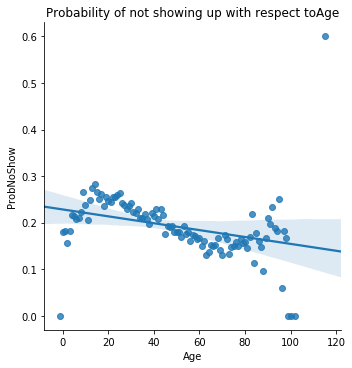

No-show,No,Yes,ProbNoShow,WaitingDays
WaitingDays,,,,
-7,0,1,1.000000,-7
-2,0,4,1.000000,-2
-1,36771,1792,0.046469,-1
0,4100,1113,0.213505,0
1,5123,1602,0.238216,1
2,2093,644,0.235294,2
3,4059,1231,0.232703,3
4,2405,872,0.266097,4
5,3036,1001,0.247956,5


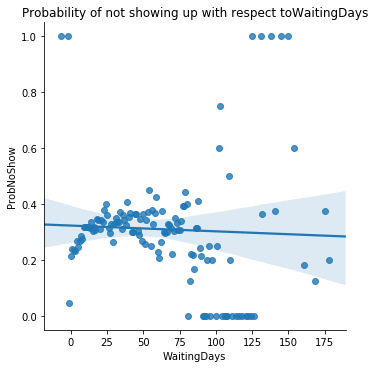

In [8]:
def plotNoShowProb(df,category):
    mydf = pd.crosstab(df[category], df['No-show'], rownames=[category], colnames=['No-show'])
    mydf['ProbNoShow'] = mydf['Yes']/(mydf['Yes']+mydf['No'])
    mydf[category] = mydf.index
    display(mydf)
    sns.lmplot(data = mydf, x = category, y = 'ProbNoShow', fit_reg = True)
    mystr = 'Probability of not showing up with respect to' + category
    plt.title(mystr)
    plt.show()
fea = ['Age','WaitingDays']
for f in fea:
    plotNoShowProb(df,f)

##### Removing records with age < 0 and waitingdays<0, as they are erroneous

In [9]:
df = df[(df['Age']>=0)]
df = df[(df['WaitingDays']>=0)]
print('Records in dataframe after removal of erroneous records : '+str(len(df)))

Records in dataframe after removal of erroneous records : 71959


##### Convert label No-show and features Gender, Neighbourhood into integer value labels/features as No-showStatus, GenStatus & Neigh-Status respectively

In [10]:
df['GenStatus'] = df.Gender.apply(lambda x: 1 if x=='M' else 0)
df['No-showStatus'] = df['No-show'].apply(lambda x:1 if x=='Yes' else 0)
neighlist = list(set(df['Neighbourhood'].values))
df['Neigh-Status'] = df['Neighbourhood']
for i in range(len(neighlist)):
    neigh = neighlist[i]
    df['Neigh-Status'] = df['Neigh-Status'].apply(lambda x: i if (x==neigh) else x)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,...,SMS_received,No-show,HourOfDay,ScheduledDoW,AppointmentDoW,WaitingDays,AppointmentMonth,GenStatus,No-showStatus,Neigh-Status
5,9.598513e+13,5626772,F,2016-04-27 08:36:51,2016-04-29,76,REPÚBLICA,0,1,0,...,0,No,0,2,4,1,4,0,0,17
6,7.336882e+14,5630279,F,2016-04-27 15:05:12,2016-04-29,23,GOIABEIRAS,0,0,0,...,0,Yes,0,2,4,1,4,0,1,62
7,3.449833e+12,5630575,F,2016-04-27 15:39:58,2016-04-29,39,GOIABEIRAS,0,0,0,...,0,Yes,0,2,4,1,4,0,1,62
9,7.812456e+13,5629123,F,2016-04-27 12:48:25,2016-04-29,19,CONQUISTA,0,0,0,...,0,No,0,2,4,1,4,0,0,12
10,7.345362e+14,5630213,F,2016-04-27 14:58:11,2016-04-29,30,NOVA PALESTINA,0,0,0,...,0,No,0,2,4,1,4,0,0,40


##### Splitting data into train and test with positive and negative cases in same proportion as the original population

In [11]:
posdf = df[df['No-show']=='Yes']
negdf = df[df['No-show']=='No']

posTraindf = posdf.sample(frac=0.7).reset_index(drop=True)
posTestdf = pd.concat([posTraindf,posdf]).drop_duplicates(keep=False).reset_index(drop=True)

negTraindf = negdf.sample(frac=0.7).reset_index(drop=True)
negTestdf = pd.concat([negTraindf,negdf]).drop_duplicates(keep=False).reset_index(drop=True)

Traindf = pd.concat([posTraindf,negTraindf]).reset_index(drop=True)
Testdf = pd.concat([posTestdf,negTestdf]).reset_index(drop=True)
print('Training Set Size : '+str(len(Traindf)))
print('Test Set Size : '+str(len(Testdf)))

Training Set Size : 50371
Test Set Size : 21588


##### Select features and do a Multinomial Naive Bayes Classification

In [12]:
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
features = ['Age', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap','SMS_received',
            'GenStatus','AppointmentDoW','ScheduledDoW','AppointmentMonth','WaitingDays','Neigh-Status']

X = Traindf[features].values
Y = Traindf[['No-showStatus']].values
Y = Y.flatten()

Xt = Testdf[features].values
Yt = Testdf[['No-showStatus']].values
Yt = Yt.flatten()

clf =  MultinomialNB().fit(X, Y)

y_true = Yt
y_pred = clf.predict(Xt)
print(classification_report(y_true, y_pred))
print(confusion_matrix(y_true, y_pred))


              precision    recall  f1-score   support

           0       0.75      0.67      0.71     15431
           1       0.35      0.44      0.39      6157

    accuracy                           0.60     21588
   macro avg       0.55      0.55      0.55     21588
weighted avg       0.63      0.60      0.61     21588

[[10294  5137]
 [ 3446  2711]]
